# PDAP-2018: Session 14 (06 July 2018): *xarray*

## Links

- [xarray documentation](http://xarray.pydata.org/en/stable/)
- [Example: Toy weather data](http://xarray.pydata.org/en/stable/examples/weather-data.html)
- [Plotting](http://xarray.pydata.org/en/stable/plotting.html)
- [Time interval (*"offset"*) alias list from pandas](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases)

## Transcript

Now following is the original transcript as used in class on 06 July 2018.

In [1]:
import xarray as xr

In [2]:
ds = xr.open_dataset('temp_minmax.nc')
ds

<xarray.Dataset>
Dimensions:   (location: 3, time: 731)
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
  * location  (location) object 'IA' 'IN' 'IL'
Data variables:
    tmin      (time, location) float64 ...
    tmax      (time, location) float64 ...

In [4]:
da = ds['tmin']  # or simply ds.tmin
da

<xarray.DataArray 'tmin' (time: 731, location: 3)>
array([[ -8.037369,  -1.788441,  -3.931542],
       [ -9.341157,  -6.558073,   0.132037],
       [-12.139719,  -6.146419,  -1.061873],
       ...,
       [ -5.347238, -13.374598,  -4.932212],
       [ -2.672836,  -5.180721,  -4.115679],
       [  2.063276,  -1.345764,  -4.543927]])
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
  * location  (location) object 'IA' 'IN' 'IL'

In [7]:
ds

<xarray.Dataset>
Dimensions:   (location: 3, time: 731)
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
  * location  (location) object 'IA' 'IN' 'IL'
Data variables:
    tmin      (time, location) float64 -8.037 -1.788 -3.932 -9.341 -6.558 ...
    tmax      (time, location) float64 12.98 3.31 6.779 0.4479 6.373 4.843 ...

In [9]:
df = ds.to_dataframe()
df.head()

tmin       tmax
location time                            
IA       2000-01-01  -8.037369  12.980549
         2000-01-02  -9.341157   0.447856
         2000-01-03 -12.139719   5.322699
         2000-01-04  -7.492914   1.889425
         2000-01-05  -0.447129   0.791176

In [10]:
df.describe()

,tmin,tmax
count,2193.000000,2193.000000
mean,9.975426,20.108232
std,10.963228,11.010569
min,-13.395763,-3.506234
25%,-0.040347,9.853905
50%,10.060403,19.967409
75%,20.083590,30.045588
max,33.456060,43.271148


In [2]:
%matplotlib inline

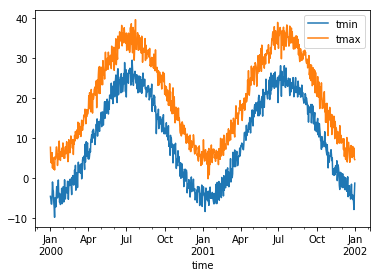

In [15]:
ds.mean(dim='location').to_dataframe().plot()

In [19]:
ds

<xarray.Dataset>
Dimensions:   (location: 3, time: 731)
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
  * location  (location) object 'IA' 'IN' 'IL'
Data variables:
    tmin      (time, location) float64 -8.037 -1.788 -3.932 -9.341 -6.558 ...
    tmax      (time, location) float64 12.98 3.31 6.779 0.4479 6.373 4.843 ...

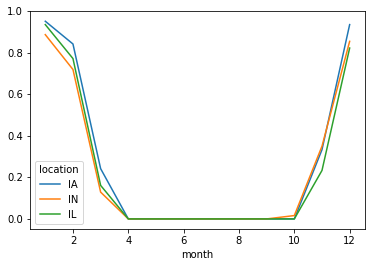

In [26]:
pfreeze = (ds.tmin < 0).astype(int).groupby('time.month').mean('time')
pfreeze.to_pandas().plot()

In [41]:
da = ds.tmin
da[:, 0]

<xarray.DataArray 'tmin' (time: 731)>
array([ -8.037369,  -9.341157, -12.139719, ...,  -5.347238,  -2.672836,
         2.063276])
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
    location  <U2 'IA'

In [42]:
da.loc[:, 'IA']

<xarray.DataArray 'tmin' (time: 731)>
array([ -8.037369,  -9.341157, -12.139719, ...,  -5.347238,  -2.672836,
         2.063276])
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
    location  <U2 'IA'

In [43]:
da.isel(location=0)

<xarray.DataArray 'tmin' (time: 731)>
array([ -8.037369,  -9.341157, -12.139719, ...,  -5.347238,  -2.672836,
         2.063276])
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
    location  <U2 'IA'

In [44]:
da.sel(location='IA')

<xarray.DataArray 'tmin' (time: 731)>
array([ -8.037369,  -9.341157, -12.139719, ...,  -5.347238,  -2.672836,
         2.063276])
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
    location  <U2 'IA'

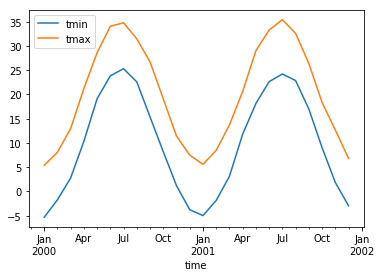

In [47]:
monthly_avg = ds.resample(time='1MS').mean()
monthly_avg.sel(location='IA').to_dataframe().plot()

In [52]:
monthly_avg.to_netcdf('mytest.nc')

In [53]:
!ncdump -h mytest.nc

netcdf mytest {
dimensions:
	time = 24 ;
	location = 3 ;
variables:
	int64 time(time) ;
		time:units = "days since 2000-01-01 00:00:00" ;
		time:calendar = "proleptic_gregorian" ;
	string location(location) ;
	double tmin(time, location) ;
		tmin:_FillValue = NaN ;
	double tmax(time, location) ;
		tmax:_FillValue = NaN ;
}


In [54]:
import numpy as np
import pandas as pd

In [57]:
lats = np.linspace(-89., 89., 90)
lons = np.linspace(-179., 179., 180)
alts = np.linspace(0., 10., 11)
times = pd.date_range('2000-01-01', '2000-12-31', name='time')

In [58]:
lats.shape, lons.shape, alts.shape, times.shape

((90,), (180,), (11,), (366,))

In [59]:
data = np.random.randn(366, 11, 90, 180)

In [61]:
data.nbytes

521769600

In [69]:
arr = xr.DataArray(data, {'lat': lats, 'lon': lons,
                          'z': alts, 'time': times, 'location': 1},
                   ['time', 'z', 'lat', 'lon'])
arr.attrs['standard_name'] = 'standard_random_noise'
arr

<xarray.DataArray (time: 366, z: 11, lat: 90, lon: 180)>
array([[[[-0.151598, ..., -0.180627],
         ...,
         [ 0.965639, ..., -3.822133]],

        ...,

        [[ 0.48618 , ...,  1.5429  ],
         ...,
         [ 0.406038, ..., -0.328708]]],


       ...,


       [[[-0.651565, ..., -0.143251],
         ...,
         [-1.422431, ...,  0.690631]],

        ...,

        [[-0.615324, ...,  0.353043],
         ...,
         [ 0.678904, ..., -0.869187]]]])
Coordinates:
  * lat       (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 -79.0 -77.0 -75.0 ...
  * lon       (lon) float64 -179.0 -177.0 -175.0 -173.0 -171.0 -169.0 -167.0 ...
  * z         (z) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
    location  int64 1
Attributes:
    standard_name:  standard_random_noise

In [66]:
dset = xr.Dataset({'mydata1': arr})
dset

<xarray.Dataset>
Dimensions:   (lat: 90, lon: 180, time: 366, z: 11)
Coordinates:
  * lat       (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 -79.0 -77.0 -75.0 ...
  * lon       (lon) float64 -179.0 -177.0 -175.0 -173.0 -171.0 -169.0 -167.0 ...
  * z         (z) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
    location  int64 1
Data variables:
    mydata1   (time, z, lat, lon) float64 -0.1516 -0.4303 1.407 1.27 0.4368 ...

In [67]:
dset.to_netcdf('mydata1.nc')

In [68]:
!ncdump -h mydata1.nc

netcdf mydata1 {
dimensions:
	lat = 90 ;
	lon = 180 ;
	z = 11 ;
	time = 366 ;
variables:
	double lat(lat) ;
		lat:_FillValue = NaN ;
	double lon(lon) ;
		lon:_FillValue = NaN ;
	double z(z) ;
		z:_FillValue = NaN ;
	int64 time(time) ;
		time:units = "days since 2000-01-01 00:00:00" ;
		time:calendar = "proleptic_gregorian" ;
	int64 location ;
	double mydata1(time, z, lat, lon) ;
		mydata1:_FillValue = NaN ;
		mydata1:coordinates = "location" ;
}


In [70]:
arrcopy = arr.copy()
arrcopy[:] = np.nan
arrcopy

<xarray.DataArray (time: 366, z: 11, lat: 90, lon: 180)>
array([[[[nan, ..., nan],
         ...,
         [nan, ..., nan]],

        ...,

        [[nan, ..., nan],
         ...,
         [nan, ..., nan]]],


       ...,


       [[[nan, ..., nan],
         ...,
         [nan, ..., nan]],

        ...,

        [[nan, ..., nan],
         ...,
         [nan, ..., nan]]]])
Coordinates:
  * lat       (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 -79.0 -77.0 -75.0 ...
  * lon       (lon) float64 -179.0 -177.0 -175.0 -173.0 -171.0 -169.0 -167.0 ...
  * z         (z) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
    location  int64 1
Attributes:
    standard_name:  standard_random_noise

In [76]:
arr.loc[:, :, 80:90, 40:170]

<xarray.DataArray (time: 366, z: 11, lat: 5, lon: 65)>
array([[[[-2.193361, ..., -1.383894],
         ...,
         [ 0.993624, ...,  1.249059]],

        ...,

        [[-0.064155, ...,  1.493378],
         ...,
         [-0.36101 , ..., -0.480138]]],


       ...,


       [[[ 0.742462, ..., -1.092213],
         ...,
         [-1.074107, ...,  0.496383]],

        ...,

        [[-1.108862, ...,  0.850942],
         ...,
         [-0.137139, ..., -0.23745 ]]]])
Coordinates:
  * lat       (lat) float64 81.0 83.0 85.0 87.0 89.0
  * lon       (lon) float64 41.0 43.0 45.0 47.0 49.0 51.0 53.0 55.0 57.0 ...
  * z         (z) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
    location  int64 1
Attributes:
    standard_name:  standard_random_noise

In [78]:
arr.sel(z=1, lat=slice(80, 90), lon=[41, 169])

<xarray.DataArray (time: 366, lat: 5, lon: 2)>
array([[[ 2.332146,  0.912782],
        [ 0.608166,  0.805274],
        ...,
        [ 0.967559,  0.040316],
        [-0.831776, -0.15467 ]],

       [[ 0.687679,  1.873992],
        [-1.133114, -0.495558],
        ...,
        [-0.911504,  1.448055],
        [-0.514191, -0.725952]],

       ...,

       [[ 1.966742, -0.579256],
        [ 1.886453, -0.926071],
        ...,
        [-0.484899,  0.739433],
        [-0.601457,  0.010238]],

       [[ 0.047778,  0.143237],
        [ 1.496633,  0.913671],
        ...,
        [-0.225675, -0.655275],
        [ 0.179517,  0.06608 ]]])
Coordinates:
  * lat       (lat) float64 81.0 83.0 85.0 87.0 89.0
  * lon       (lon) float64 41.0 169.0
    z         float64 1.0
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
    location  int64 1
Attributes:
    standard_name:  standard_random_noise

In [81]:
arr.sel(lat=82, method='nearest')

<xarray.DataArray (time: 366, z: 11, lon: 180)>
array([[[ 2.700337,  1.239998, ..., -1.775241, -0.109396],
        [-1.904855, -1.552797, ..., -0.068989, -1.686855],
        ...,
        [-0.487662,  1.766935, ..., -0.618088,  0.2647  ],
        [ 0.342474,  0.640813, ..., -1.437202, -0.553783]],

       [[-1.515215,  0.198131, ..., -0.201012,  0.914964],
        [-0.847103,  0.126674, ...,  0.450495,  0.911595],
        ...,
        [-0.640326, -0.548199, ..., -0.151136,  1.955329],
        [-0.297631, -0.336362, ...,  1.774002,  0.175349]],

       ...,

       [[-0.989473, -0.170158, ..., -0.663887, -1.646429],
        [ 0.348923, -0.470351, ...,  1.10392 ,  0.041171],
        ...,
        [-1.585146, -0.040626, ..., -1.280053,  0.003211],
        [ 0.467471,  1.373985, ...,  1.662417,  0.037966]],

       [[-0.999901,  0.83777 , ..., -1.63165 ,  0.443179],
        [-1.045747,  1.696304, ..., -2.175896, -0.205142],
        ...,
        [ 1.122174,  0.236075, ...,  0.202514,  0.52152

In [82]:
arr.interp(lat=82)

AttributeError: 'DataArray' object has no attribute 'interp'

In [85]:
arr.sel(lat=slice(None, 80))

<xarray.DataArray (time: 366, z: 11, lat: 85, lon: 180)>
array([[[[-0.151598, ..., -0.180627],
         ...,
         [ 0.030935, ..., -0.820678]],

        ...,

        [[ 0.48618 , ...,  1.5429  ],
         ...,
         [ 1.97032 , ...,  3.5769  ]]],


       ...,


       [[[-0.651565, ..., -0.143251],
         ...,
         [ 1.086139, ..., -0.98413 ]],

        ...,

        [[-0.615324, ...,  0.353043],
         ...,
         [ 0.204655, ...,  1.190852]]]])
Coordinates:
  * lat       (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 -79.0 -77.0 -75.0 ...
  * lon       (lon) float64 -179.0 -177.0 -175.0 -173.0 -171.0 -169.0 -167.0 ...
  * z         (z) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
    location  int64 1
Attributes:
    standard_name:  standard_random_noise

In [84]:
arr.sel(lat=slice(80, None))

<xarray.DataArray (time: 366, z: 11, lat: 5, lon: 180)>
array([[[[ 2.632639, ..., -0.718408],
         ...,
         [ 0.965639, ..., -3.822133]],

        ...,

        [[ 1.499296, ..., -0.178318],
         ...,
         [ 0.406038, ..., -0.328708]]],


       ...,


       [[[ 0.415435, ..., -1.185902],
         ...,
         [-1.422431, ...,  0.690631]],

        ...,

        [[ 0.043055, ...,  0.664916],
         ...,
         [ 0.678904, ..., -0.869187]]]])
Coordinates:
  * lat       (lat) float64 81.0 83.0 85.0 87.0 89.0
  * lon       (lon) float64 -179.0 -177.0 -175.0 -173.0 -171.0 -169.0 -167.0 ...
  * z         (z) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
    location  int64 1
Attributes:
    standard_name:  standard_random_noise

In [86]:
arr.where(arr > 1)

<xarray.DataArray (time: 366, z: 11, lat: 90, lon: 180)>
array([[[[   nan, ...,    nan],
         ...,
         [   nan, ...,    nan]],

        ...,

        [[   nan, ..., 1.5429],
         ...,
         [   nan, ...,    nan]]],


       ...,


       [[[   nan, ...,    nan],
         ...,
         [   nan, ...,    nan]],

        ...,

        [[   nan, ...,    nan],
         ...,
         [   nan, ...,    nan]]]])
Coordinates:
  * lat       (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 -79.0 -77.0 -75.0 ...
  * lon       (lon) float64 -179.0 -177.0 -175.0 -173.0 -171.0 -169.0 -167.0 ...
  * z         (z) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
    location  int64 1
Attributes:
    standard_name:  standard_random_noise

In [3]:
air = xr.open_dataset('temp_namerica.nc').air - 273.15
air.attrs['units'] = 'deg C'
air1d = air.isel(lat=10, lon=10)
air1d

<xarray.DataArray 'air' (time: 2920)>
array([7.640015, 7.850006, 8.049988, ..., 9.339996, 9.339996, 9.540009],
      dtype=float32)
Coordinates:
    lat      float32 50.0
    lon      float32 225.0
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Attributes:
    units:    deg C

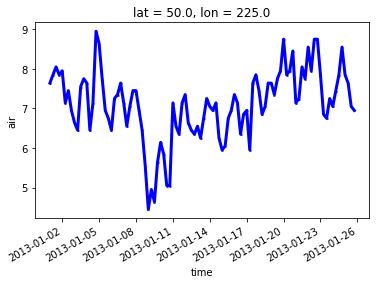

In [98]:
air1d[:100].plot.line('b-^', linewidth=3, markersize=1.5)

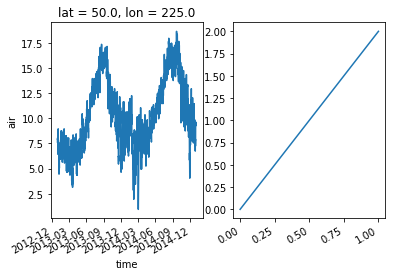

In [103]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2)
air1d.plot.line(ax=axs[0])
#air1d.plot.hist(ax=axs[1]);
axs[1].plot([0, 1], [0, 2])

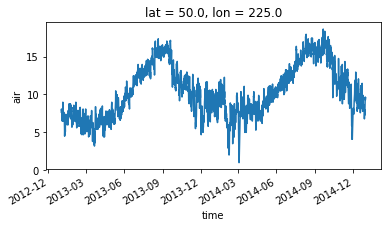

In [105]:
air1d.plot.line(aspect=2, size=3)

In [5]:
import cartopy.crs as ccrs

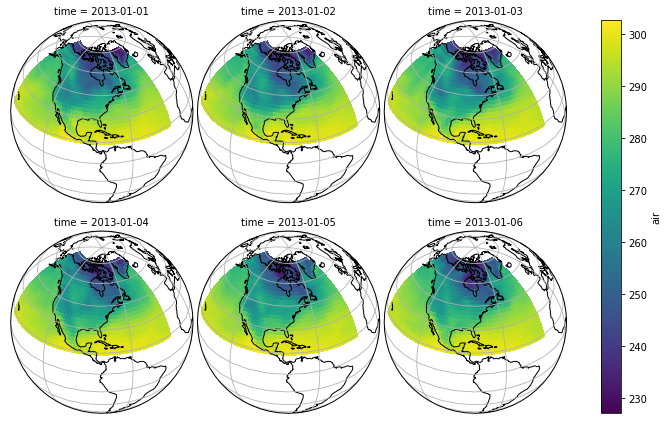

In [14]:
p = (air + 273.15).isel(time=[0, 4, 8, 12, 16, 20]).plot(
    transform=ccrs.PlateCarree(), col='time', col_wrap=3,
    subplot_kws={'projection': ccrs.Orthographic(-80, 35)})

for ax in p.axes.flat:
    ax.coastlines()
    ax.gridlines()